In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data_c = pd.read_csv("resources/vp004rb_C.csv", header = None)
data_o = pd.read_csv("resources/vp004rb_O.csv", header = None)
data_co = pd.read_csv("resources/vp004rb_CO.csv", header = None)

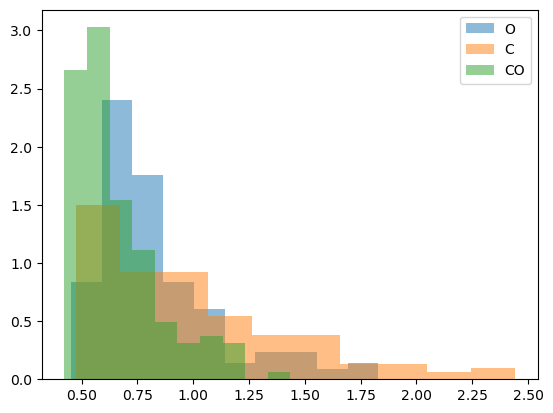

In [23]:
plt.hist(data_o, label = "O", alpha = 0.5, density = True)
plt.hist(data_c, label = "C", alpha = 0.5, density = True)
plt.hist(data_co, label = "CO", alpha = 0.5, density = True)
plt.legend()
plt.show()

In [36]:
pd.DataFrame(
    {
        "Data": [ data_o[0] ],
        "Type": np.repeat("O", len(data_o))
    }
)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1219036608.py, line 2)

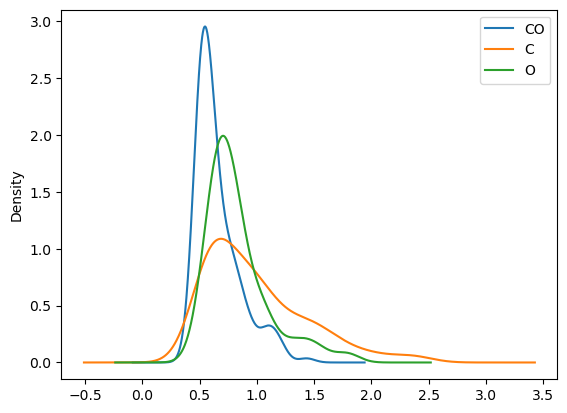

In [58]:
data_o["Data"] = data_o[0]
data_o["Type"] = "O"

data_c["Data"] = data_c[0]
data_c["Type"] = "C"

data_co["Data"] = data_co[0]
data_co["Type"] = "CO"

data = pd.concat([data_co, data_c, data_o])

data.groupby(pd.Grouper('Type'))['Data'].plot(kind='density', legend=True)
plt.show()

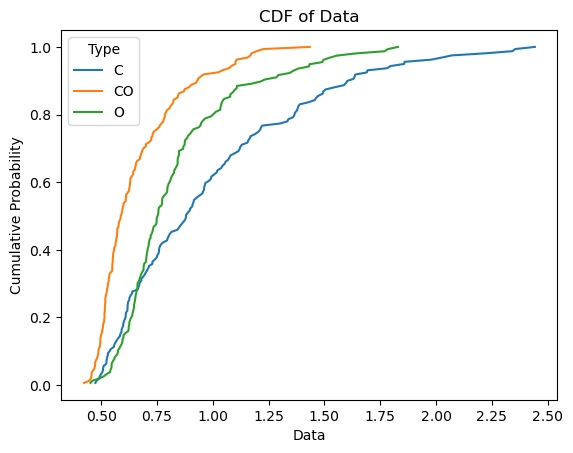

In [61]:
def plot_ecdf(data, label):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    plt.plot(x, y, label=label)

# Plot CDFs
for label, df in data.groupby('Type'):
    plot_ecdf(df['Data'], label)

plt.title('CDF of Data')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.legend(title='Type')
plt.show()

In [68]:
def race_model(x, y, n_trials = 10_000):
    data_x = x.sample(n = n_trials, replace=True)["Data"]
    data_y = y.sample(n = n_trials, replace=True)["Data"]
    
    return np.min([data_x, data_y], axis = 0)

In [70]:
data_min_co = pd.DataFrame()
data_min_co["Data"] = race_model(data_o, data_c)
data_min_co["Type"] = "Race"

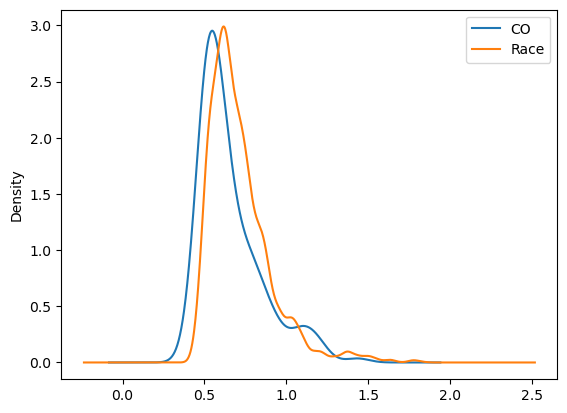

In [71]:
data = pd.concat([data_co, data_min_co])

data.groupby(pd.Grouper('Type'))['Data'].plot(kind='density', legend=True)
plt.show()

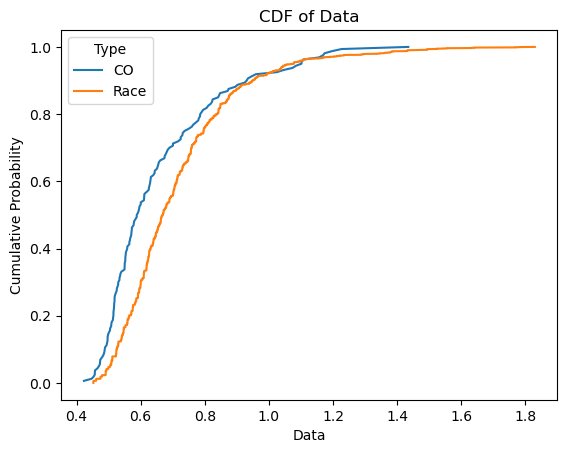

In [72]:
def plot_ecdf(data, label):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    plt.plot(x, y, label = label)


# Plot CDFs
for label, df in data.groupby('Type'):
    plot_ecdf(df['Data'], label)

plt.title('CDF of Data')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.legend(title = 'Type')
plt.show()

In [73]:
import numpy as np
from scipy import stats

data_co_values = data_co['Data']
data_race_co_values = data_min_co['Data']

t_statistic, p_value = stats.ttest_ind(data_co_values, data_race_co_values)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -3.6691654462174377
P-value: 0.0002445887165490732
